# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))

X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

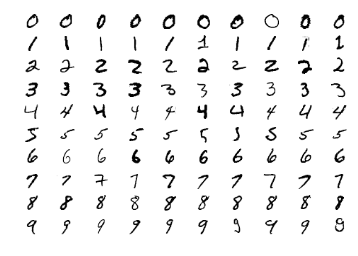

In [16]:
def P1(num_examples=10):

### STUDENT START ###
    
    #Initialize a pyplot figure object
    f = plt.figure()
    #iterate from j = 0 to 9 for each digit
    for j in range(num_examples):
        # select indices of required digit
        dgt_inx= np.where(mnist.target ==j)
        #select sub-array of chosen digit
        D, T = mnist.data[dgt_inx], mnist.target[dgt_inx]
        #iterate through 10 subplots of each digit
        for i in range(num_examples):
            ax = f.add_subplot(10, 10, i + 1 + (10 * j))
            img = D[i]  
            ax.imshow(img.reshape(28, 28), cmap="Greys") 
            ax.axis('off')       
    plt.show()
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [17]:
def P2(k_values):

### STUDENT START ###
    # iterate through each k neighbor values
    for i in range (len(k_values)):
        # choose knn using eclidean distance
        knn_params = KNeighborsClassifier(n_neighbors=k_values[i], metric='minkowski', p = 2) 
        # train knn classifier
        knn_fit = knn_params.fit(mini_train_data, mini_train_labels)
        # for each k-value, print perfomance metrics
        print 'k-value:', k_values[i], 'score:', knn_fit.score(dev_data, dev_labels)
        # for k = 1, break down accuracy by digit
        if k_values[i] ==1:
            y_pred =  knn_fit.predict(dev_data)
            print(classification_report(dev_labels, y_pred))     
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k-value: 1 score: 0.888
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

k-value: 3 score: 0.878
k-value: 5 score: 0.869
k-value: 7 score: 0.865
k-value: 9 score: 0.863


ANSWER: The most dificult digit is 9

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [18]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    # fit euclidean distance based 1-nn
    knn_params = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p = 2)
    # iterate through different training sample sizes
    for i in range (len(train_sizes)):
        # record time at the beginning 
        start = time.time()
        # subset training data
        train_sub_data, train_sub_labels = train_data[:train_sizes[i]], train_labels[:train_sizes[i]]
        # train model on subset
        knn_fit = knn_params.fit(train_sub_data, train_sub_labels)
        # extract scoring max
        acc = knn_fit.score(dev_data, dev_labels)
        accuracies = np.append(accuracies, acc)
        # get end of cycle wall time
        print 'training size:', train_sizes[i], 'score:', acc, 'duration(sec)', round(time.time()-start, 3)
    return accuracies 
    
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

training size: 100 score: 0.72 duration(sec) 0.949
training size: 200 score: 0.786 duration(sec) 0.99
training size: 400 score: 0.841 duration(sec) 2.116
training size: 800 score: 0.884 duration(sec) 4.355
training size: 1600 score: 0.902 duration(sec) 8.125
training size: 3200 score: 0.926 duration(sec) 18.353
training size: 6400 score: 0.937 duration(sec) 37.758
training size: 12800 score: 0.959 duration(sec) 83.418
training size: 25000 score: 0.97 duration(sec) 172.119


array([ 0.72 ,  0.786,  0.841,  0.884,  0.902,  0.926,  0.937,  0.959,
        0.97 ])

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

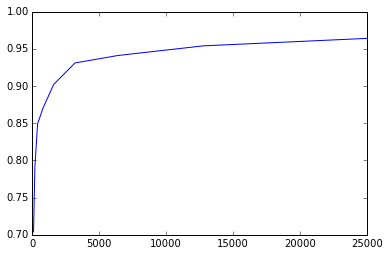

('Coefficients: ', array([[  6.53245517e-06]]))
for 60k, linearly predict:  [[ 1.23373742]]


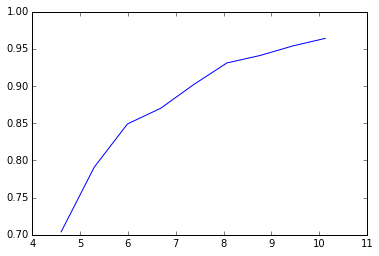

for 60k, logarithmically predict:  [[ 1.03360546]]


In [20]:
def P4():

### STUDENT START ###
    # couldnt get P3 values to pass to P4, so introduced them explicitly
    accuracies =  np.array([ 0.704,  0.791,  0.849,  0.87 ,  0.902,  0.931,  0.941,  0.954, 0.964])
    train_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000])
    # transpose the input arrays to match fit input requirements  
    accuracies = accuracies[:, np.newaxis]    
    train_sizes = train_sizes[:, np.newaxis]
    # scatterplot
    plt.plot(train_sizes, accuracies)
    plt.show()
    # fit linear regression
    ft= LinearRegression()
    ft.fit(train_sizes, accuracies)
    print('Coefficients: ', ft.coef_)
    print 'for 60k, linearly predict: ', ft.predict(np.array([60000]))
    
    #plot logarithmic relationship and fit linear regression of transformed
    plt.plot(np.log(train_sizes), accuracies)
    plt.show()
    ft2 =LinearRegression()
    ft2.fit(np.log(train_sizes),  accuracies)
       
    print 'for 60k, logarithmically predict: ', ft2.predict(np.array([np.log(60000)]))
    
### STUDENT END ###

P4()

ANSWER: For n=60000, accuracy is 1.23, which doesnt make sense for a probability . The relationship is not linear, it is logarithmic so linear regression is not proper. A plot of x=LOG(train_sizes) vs. y=accuracies is more linear, though still has a polynomial component.  

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion matrix:
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
9.0


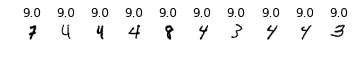

In [22]:
def P5():

### STUDENT START ###
    # 1 knn classifier
    knn_params = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p = 2)  #euclidean
    knn_fit = knn_params.fit(mini_train_data, mini_train_labels)
    expected = dev_labels
    predicted =  knn_params.predict(dev_data)
    # confusion matrix for comparing expected labels and predictions
    print "Confusion matrix:\n", confusion_matrix(expected, predicted)
    # identify false prediction indices
    mismatch= np.where(expected != predicted)
    # select dev data false predicted
    dev_x_false, dev_y_false = dev_data[mismatch], dev_labels[mismatch]
    # predictions match dev aray shape, so same indicies apply
    pred_y_false = predicted[mismatch]
    # identify most problematic digit  
    print np.max(pred_y_false)
    
    # identified 9 as most problematic digit    
    x_false_example, p_false_label =dev_x_false[pred_y_false == 9], pred_y_false[pred_y_false == 9]
        
    # plot some mislabeled digits, falsely labeled 9
    f = plt.figure()
    for i in range(10):
        g = f.add_subplot(10, 10, i+1)
        img = x_false_example[i]                                                                                                          
        g.imshow(img.reshape(28, 28), cmap="Greys")   
        g.set_title(p_false_label[i])
        g.axis('off')   
    plt.show()            
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [10]:
#def P6():
    
### STUDENT START ###


### STUDENT END ###

#P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [23]:
def P7():

### STUDENT START ###
    # fit bernoulli naive bayesian, with binarize argument set
    Bclf = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
    Bclf.fit(train_data, train_labels)
    Bclf.predict(dev_data)
    print 'using Bernoulli: ' , Bclf.score(dev_data, dev_labels)
    
    # discretize training and test data into 0, 1, 2 using round function 
    tertiarized_dev_data = np.round(dev_data*2, 0)
    tertiarized_train_data = np.round(train_data*2, 0)
    # fit multinomial naive bayesia on tertiarized data  
    Mclf = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
    Mclf.fit(tertiarized_train_data, train_labels)
    Mclf.predict(tertiarized_dev_data)
    print 'using Multinomial: ' , Mclf.score(tertiarized_dev_data, dev_labels)
### STUDENT END ###
P7()

using Bernoulli:  0.826
using Multinomial:  0.833


ANSWER: Using Bernoulli accuracy is 0.826 and using Multinomial 0.833.  The multi-class version improves the results because it allows for better resolution of digits.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [25]:
def P8(alphas):

### STUDENT START ###
    # fit bernoulli naive bayesian, with binarize argument set
    Bclf = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
    # iterate alpha valuse through grid-search
    clf = GridSearchCV(Bclf, alphas)
    clf.fit(train_data, train_labels)
    # print perfomance metrics
    print  clf.grid_scores_, clf.best_score_ ,  clf.best_params_        
    return clf.best_params_ 
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

[mean: 0.09892, std: 0.00002, params: {'alpha': 0.0}, mean: 0.83327, std: 0.00258, params: {'alpha': 0.0001}, mean: 0.83317, std: 0.00254, params: {'alpha': 0.001}, mean: 0.83300, std: 0.00259, params: {'alpha': 0.01}, mean: 0.83267, std: 0.00253, params: {'alpha': 0.1}, mean: 0.83225, std: 0.00249, params: {'alpha': 0.5}, mean: 0.83200, std: 0.00245, params: {'alpha': 1.0}, mean: 0.83160, std: 0.00249, params: {'alpha': 2.0}, mean: 0.82987, std: 0.00250, params: {'alpha': 10.0}] BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True) 0.833266666667 {'alpha': 0.0001}


C:\Users\hmunedz\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\naive_bayes.py:707: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


In [24]:
#print nb.best_params_

1


ANSWER:  Best value for alpha is 0.0001 . When alpha=0 is 0.833. I would expect larger impact from smoothing.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [28]:
def P9():

### STUDENT END ###
    Gclf = GaussianNB()
    Gclf2 = Gclf.fit(train_data*255, train_labels)
    # print  np.amin(Gclf2.theta_), np.amax(Gclf2.theta_),  Gclf2.sigma_
    
    Gclf.predict(dev_data*255)
    
    print 'accuracy: ' , Gclf.score(dev_data*255, dev_labels)
    
### STUDENT END ###

gnb = P9()

accuracy:  0.535


ANSWER: My solution was rescaling dev and train labels to real values by factor 255

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [26]:
def P10(num_examples):

### STUDENT START ###
    # fit Bernoulli Naive bayesian
    Bclf = BernoulliNB(alpha=0.0001, binarize=0.0, fit_prior=True, class_prior=None)
    #estimated probabilities
    est_probs = np.exp(Bclf.fit(train_data, train_labels).feature_log_prob_)
    print est_probs.shape
    
    est_pixels = np.round(est_probs, 0)

    print est_pixels

### STUDENT END ###

P10(20)

(10L, 784L)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


ANSWER: How do the generated digits compare to the training digits. TBD

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [27]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    # fit Bernoulli Naive bayesian
    Bclf = BernoulliNB(alpha=0.0001, binarize=0.0, fit_prior=True, class_prior=None) 
    Bclf.fit(train_data, train_labels)
    Bclf.predict(dev_data)
    # print Bclf.predict_proba(dev_data)
    # est_probs = np.exp(Bclf.fit(train_data, train_labels).feature_log_prob_)
    # print correct
    for i in range(len(buckets)):
        accuracy = 0.0
        if (total[i] > 0): accuracy = correct[i] / total[i]
        print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9990000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999900000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999990000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999999900    total =   0    accuracy = 0.000
p(pred) <= 0.9999999999999    total =   0    accuracy = 0.000
p(pred) <= 1.0000000000000    total =   0    accuracy = 0.000


ANSWER: How would you characterize the calibration for the Naive Bayes model?

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()